In [ ]:
"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

In [2]:
import pandas as pd
import numpy as np
import os

os.chdir('D:\Education\Extra\Machine Learning\DSMP 1.0\Pandas\Exercise\Dataset')

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

###`Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [5]:
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 
        'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

birds = pd.DataFrame(data, index = labels)
birds

#2 Basic Information

birds.info()
birds.describe()

#3 Show Alternate Rows

birds.iloc[::2]

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


###`Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [7]:
#1
# birds.iloc[[1,3,7],[0,1]]
birds[['birds','age']].iloc[[0,2,6]]

,birds,age
a,Cranes,3.5
c,plovers,1.5
g,plovers,5.5


In [5]:
birds[birds['visits']<4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


###`Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [19]:
#1

birds[birds['visits'].isna() | birds['age'].isna()]


#2
birds['age'] = birds['age'].fillna(birds['age'].mode()[0])
# birds['age'].mode(axis = 1)
# birds['age'].mode()[0]

birds['priority'] = birds['priority'].fillna(birds['priority'].mode()[0])

birds

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,3.5,4,no
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,3.5,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


###`Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [12]:
#1 
no_of_visits = birds[birds == 'Cranes']['visits'].sum()
print(no_of_visits)

#2
birds['birds'].drop_duplicates().size

#3
# birds[birds.duplicated()]

# #4
birds.drop_duplicates(inplace = True)
birds

0.0


,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


In [9]:
birds[birds == 'Cranes']['visits']

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
i   NaN
j   NaN
Name: visits, dtype: float64

##Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

###`Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [15]:
ipl = pd.read_csv('ipl-matches.csv')
ipl['Team1'] = ipl['Team1'].apply(lambda x : 'Punjab Kings' if x == 'Kings XI Punjab' else x)
ipl['Team2'] = ipl['Team2'].apply(lambda x : 'Punjab Kings' if x == 'Kings XI Punjab' else x)
ipl['Team1'] = ipl['Team1'].apply(lambda x : 'Delhi Capitals' if x == 'Delhi Daredevils' else x)
ipl['Team2'] = ipl['Team2'].apply(lambda x : 'Delhi Capitals' if x == 'Delhi Daredevils' else x)
ipl['Team1'] = ipl['Team1'].apply(lambda x : 'Rising Pune Supergiant' if x == 'Rising Pune Supergiants' else x)
ipl['Team2'] = ipl['Team2'].apply(lambda x : 'Rising Pune Supergiant' if x == 'Rising Pune Supergiants' else x)
# ipl['Team1'].apply(lambda x : 'Punjab Kings' if x == 'Kings XI Punjab' else x)
# ipl['Team1'].apply(lambda x : 'Punjab Kings' if x == 'Kings XI Punjab' else x)
ipl['Team2'].unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Pune Warriors', 'Deccan Chargers', 'Kochi Tuskers Kerala'],
      dtype=object)

###`Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


,1
0,
Kochi Tuskers Kerala,14
Lucknow Super Giants,15
Gujarat Titans,16
Rising Pune Supergiant,30
Gujarat Lions,30
Pune Warriors,46
Deccan Chargers,75
Sunrisers Hyderabad,152
Rajasthan Royals,192


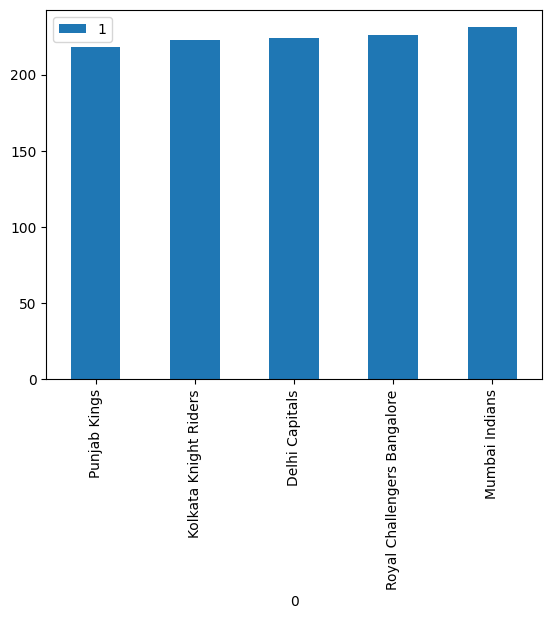

In [16]:
match = {}
import matplotlib.pyplot as plt

for item in ipl['Team1']:
    if item not in match:
        match[item] = 1
    else:
        match[item]+=1
        
for item in ipl['Team2']:
    if item not in match:
        match[item] = 1
    else:
        match[item]+=1

# print(match)

data = sorted(match.items(),key = lambda x : x[1])
data1 = pd.DataFrame(data)
data1.set_index(0,inplace = True)
data1.iloc[-5:data1.shape[0]].plot.bar()
data1

###`Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [17]:
ipl['Team1'].unique()

data = ipl[((ipl['Team1'] == 'Mumbai Indians') | (ipl['Team2'] == 'Mumbai Indians')) & ~(ipl['WinningTeam'] == 'Mumbai Indians')]
data['Player_of_Match'].value_counts().head(1)

Player_of_Match
KL Rahul    4
Name: count, dtype: int64

###`Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [19]:


def team1_vs_team2(x,y,data = ipl):
    data1 = data[((data['Team1'] == x) & (data['Team2'] == y))|
    ((data['Team1'] == y) & (data['Team2'] == x))]
    match_played = data1.shape[0]
    
    x_won = data1['WinningTeam'].value_counts().loc[x]
    y_won = data1['WinningTeam'].value_counts().loc[y]
    
    print('''Total Match Played between {} and {} are {}
{} won {} matches
{} won {} matches
    '''.format(x,y,match_played,x,x_won,y,y_won))
    print('Man of the Match most time is {}'.format(data1['Player_of_Match'].value_counts().index[0]))

team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')

Total Match Played between Kolkata Knight Riders and Chennai Super Kings are 26
Kolkata Knight Riders won 9 matches
Chennai Super Kings won 17 matches
    
Man of the Match most time is RA Jadeja


### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



<Axes: xlabel='City'>

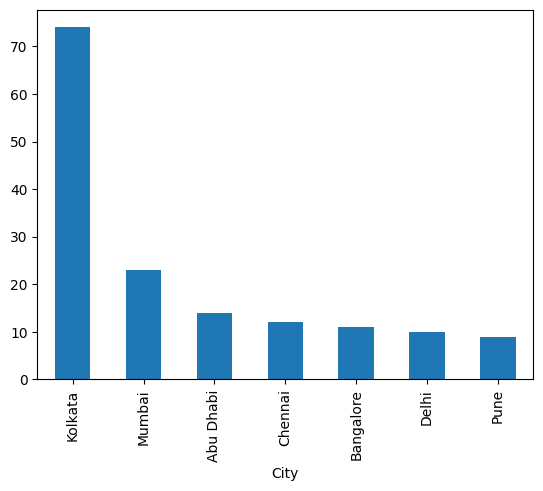

In [140]:
kkr = ipl[(ipl['Team1'] == 'Kolkata Knight Riders') | (ipl['Team2'] == 'Kolkata Knight Riders')]
kkr_venue = kkr['City'].value_counts()
kkr_venue.head(7).plot(kind = 'bar')

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [22]:
ipl_session = ipl[ipl['Season'] == '2011']
Mi_match_played = ipl_session[(ipl['Team1'] == 'Mumbai Indians') | (ipl['Team2'] == 'Mumbai Indians')].size
Mi_won_played = ipl_session[(ipl['WinningTeam'] == 'Mumbai Indians')].shape[0]
Mi_match_played

C:\Users\axitk\AppData\Local\Temp\ipykernel_7872\2576530046.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Mi_match_played = ipl_session[(ipl['Team1'] == 'Mumbai Indians') | (ipl['Team2'] == 'Mumbai Indians')].size
C:\Users\axitk\AppData\Local\Temp\ipykernel_7872\2576530046.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Mi_won_played = ipl_session[(ipl['WinningTeam'] == 'Mumbai Indians')].shape[0]


320

In [21]:
100*Mi_won_played/Mi_match_played

2.5

In [23]:
ipl_session = ipl[ipl['Season'] == '2011']
Mi_match_played = ipl_session[(ipl['Team1'] == 'Mumbai Indians') | (ipl['Team2'] == 'Mumbai Indians')].Margin.mean()
Mi_match_played

C:\Users\axitk\AppData\Local\Temp\ipykernel_7872\2976855522.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Mi_match_played = ipl_session[(ipl['Team1'] == 'Mumbai Indians') | (ipl['Team2'] == 'Mumbai Indians')].Margin.mean()


np.float64(19.25)